## Analysis of Business Model Relation
This Python scripts intention is to analyze the relation of different research findings between the business models.
<br> Main target is to define categories of business model in which similar business models can be added.

#### Upload python libs

In [112]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
 
# Upload Data as dataframe 
carac = pd.read_excel('Data Analysis/dataset_business_model_types.xlsx')

#### Placeholder 

In [113]:
carac.head(15)

,ID,type
0,License and Certificates,Cluster
1,Licensing,Sub Cluster
2,"Dual License, Hemphil (2006)",Business Model
3,"Dual License, Perr et al (2010)",Business Model
4,"Dual License, Koenig (2004)",Business Model
5,"Dual License, Mouakhar & Telter (2016)",Business Model
6,Certificates and Trademarks,Sub Cluster
7,"Promotional Material, Wassermann et al. (2016)",Business Model
8,Service Model,Cluster
9,Professional Services,Sub Cluster


#### Create and Design Network Graph 

In [114]:
# Load specified data and attributes
relationships = pd.read_excel('Data Analysis/dataset_business_model_types.xlsx','relationship')
relationships.head(15)

,from,to
0,Licensing,License and Certificates
1,"Dual License, Hemphil (2006)",Licensing
2,"Dual License, Perr et al (2010)",Licensing
3,"Dual License, Koenig (2004)",Licensing
4,"Dual License, Mouakhar & Telter (2016)",Licensing
5,Certificates and Trademarks,License and Certificates
6,"Promotional Material, Wassermann et al. (2016)",Certificates and Trademarks
7,Professional Services,Service Model
8,"Professional Services and Consulting, Perr et ...",Professional Services
9,"Optimization, Koenig (2004)",Professional Services


In [115]:
# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

ID
Licensing                                                                                      3
License and Certificates                                                                       1
Dual License, Hemphil (2006)                                                                   0
Dual License, Perr et al (2010)                                                                0
Dual License, Koenig (2004)                                                                    0
Dual License, Mouakhar & Telter (2016)                                                         0
Certificates and Trademarks                                                                    3
Promotional Material, Wassermann et al. (2016)                                                 0
Professional Services                                                                          3
Service Model                                                                                  1
Professional Services and C

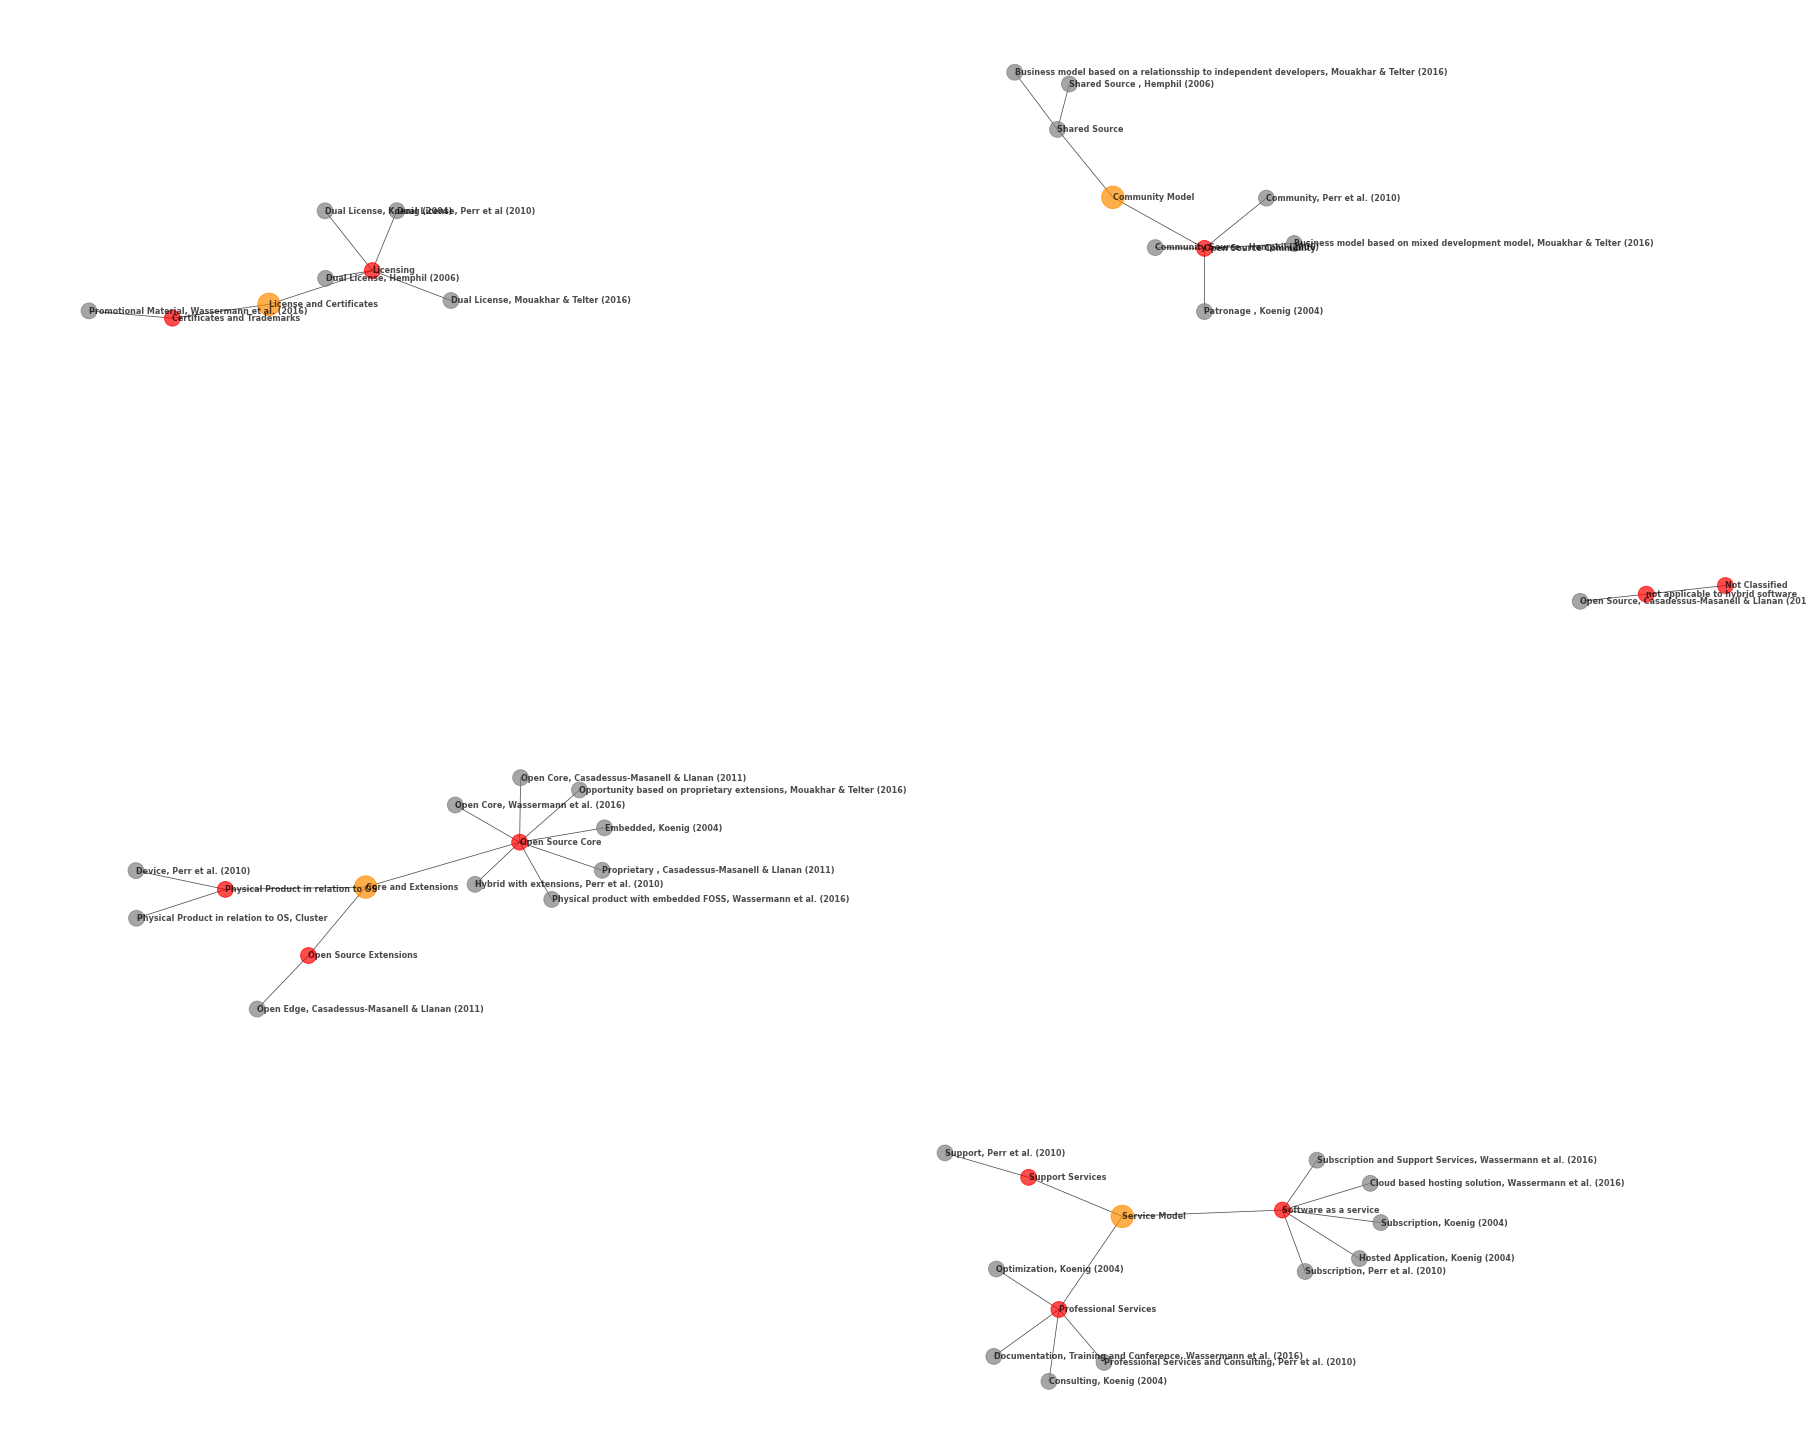

In [135]:
f = plt.figure(figsize=(25,20))
f.tight_layout()

# Set node colors
cmap = matplotlib.colors.ListedColormap(['grey', 'darkorange', 'red'])

# Set node sizes
node_sizes = [250 if x != 'Cluster' else 500 for x in carac.type]  

#Set node style 
#node_styles = ['dashdot' if x != 'Center' else 'solid' for x in relationships.to]  
#node_styles = ['dashdot' if y != 'Center' else 'solid' for y in relationships.to]

node_styles = "solid"

# Draw the graph and specify characteristics
nx.draw(G,
        with_labels=True,
        node_color=carac['type'].cat.codes,
        cmap=cmap, 
        alpha = 0.7,
        style = node_styles, #(solid|dashed|dotted,dashdot)
        arrows = bool,
        node_size=node_sizes,
        font_size=8,
        horizontalalignment = 'left',
        font_weight="bold",
        width=0.75, 
        #edgecolors='blue'
       )

G.add_nodes_from(relationships['to'])

plt.show()